![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [43]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [44]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

Basado en los datos de temporada (season) se puede identificar que:
- El número de bicicletas varía de acuerdo a la temporada
- La temporada de menor alquiler es invierno (1 winter), mientras que se alquilan más en verano (3 summer). Tiene todo el sentido pues el clima permite a las personas usar más medios de transporte como las bicicletas.

In [45]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

- La hora determina la mayor afluencia en alquiler de bicicletas
- En la madrugada se evidencia el menor nivel de alquiler, solo 55 bicicletas promedio entre las 0 y 5
- A las 5 se presenta el mayor número de alquiler de bicicletas 469

La variable "season" muestra una clara variación estacional en la demanda de alquiler de bicicletas, siendo la temporada de verano la de mayor demanda y la temporada invierno la de menor demanda. 

La variable "hour" muestra patrones de demanda diarios, con un aumento en la demanda durante las horas pico por la tarde (debe tratarse de horas donde terminan de trabajar las empresas y las clases en colegios y universidades) y una disminución durante las primeras horas de la madrugada.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

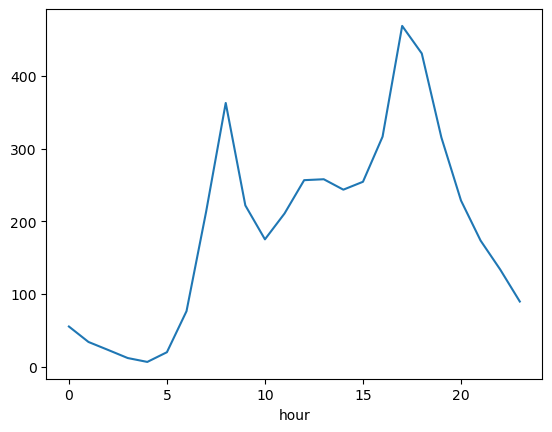

In [46]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

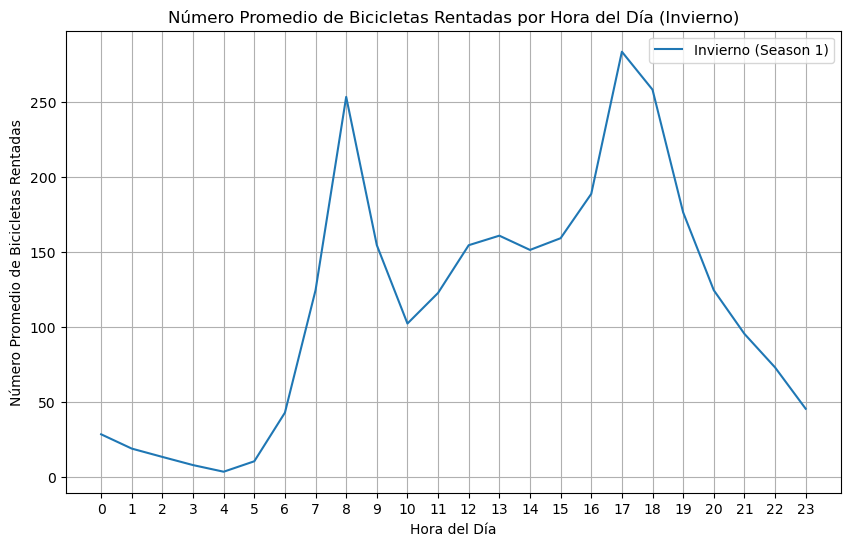

In [47]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt

# Filtrar los datos por temporada 1 (invierno)
datos_invierno = bikes[bikes['season'] == 1]

# Calcular el número promedio de bicicletas rentadas para cada hora del día en invierno
promedio_bicicletas_invierno = datos_invierno.groupby('hour')['total'].mean()

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(promedio_bicicletas_invierno, label='Invierno (Season 1)')
plt.title('Número Promedio de Bicicletas Rentadas por Hora del Día (Invierno)')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


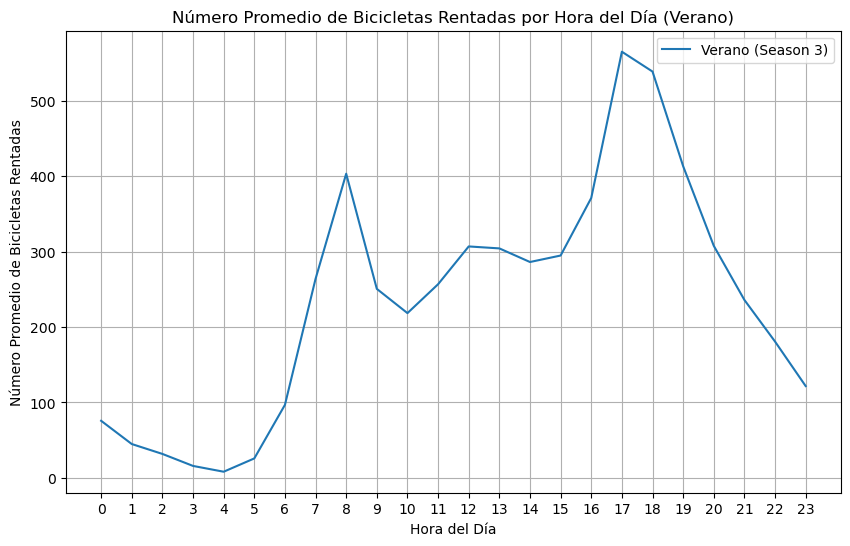

In [48]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
import matplotlib.pyplot as plt

# Filtrar los datos por temporada 3 (verano)
datos_verano = bikes[bikes['season'] == 3]

# Calcular el número promedio de bicicletas rentadas para cada hora del día en verano
promedio_bicicletas_verano = datos_verano.groupby('hour')['total'].mean()

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(promedio_bicicletas_verano, label='Verano (Season 3)')
plt.title('Número Promedio de Bicicletas Rentadas por Hora del Día (Verano)')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

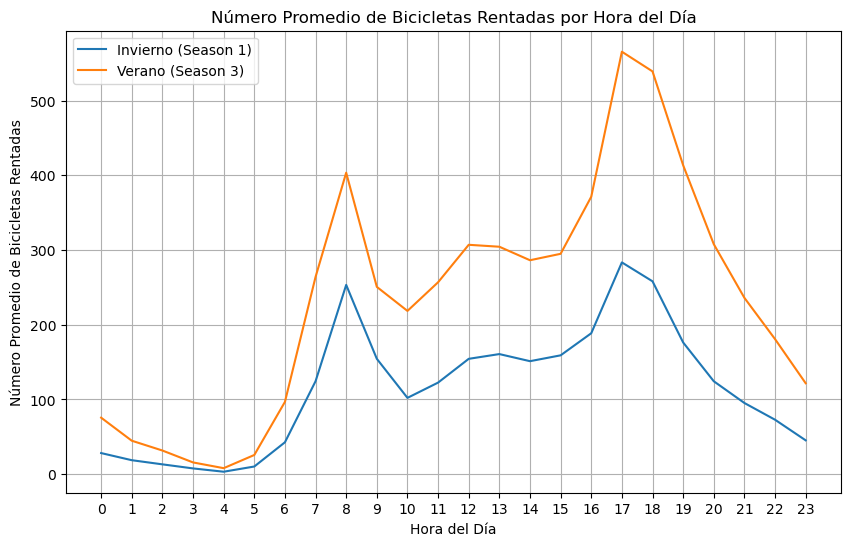

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_bicicletas_invierno, label='Invierno (Season 1)')
plt.plot(promedio_bicicletas_verano, label='Verano (Season 3)')
plt.title('Número Promedio de Bicicletas Rentadas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

La gráfica del comportamiento de alquiler de bicicletas entre invierno y verano tienen una dinámica similar con un tendencia a tener el menor flujo de alquiler en la madrugada, luego incrementándose hacia las 8am y luego de bajar de nuevo en media tarde, toca un pico en las 5 dado que es la hora con mayor afluencia de personas luego de salir de trabajos y estudios. El uso menor de la bicicleta en la temporada de invierno podría deberse a condiciones climáticas y dificultad de acceso a vías

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [50]:
# Celda 3

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Transformar la variable categórica "season" en variables dummy
bikes_nuevo = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# Separar las variables predictoras y la variable de respuesta
X = bikes_nuevo[['hour', 'season_2', 'season_3', 'season_4']]  # 'season_1' es la referencia
y = bikes_nuevo['total']

# Definir el transformador para las variables predictoras
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['hour']),  # No hacemos transformación en 'hour'
        ('cat', OneHotEncoder(drop='first'), ['season_2', 'season_3', 'season_4'])
    ])

# Definir el modelo de regresión lineal
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ajustar el modelo a los datos
model.fit(X, y)

# Imprimir los coeficientes
coeficientes = model.named_steps['regressor'].coef_
intercepto = model.named_steps['regressor'].intercept_
print("Coeficientes de las variables predictoras:")
print("Intercepto:", intercepto)
print("Coeficientes de 'hour':", coeficientes[0])
print("Coeficientes de 'season_2', 'season_3', 'season_4':", coeficientes[1:])


Coeficientes de las variables predictoras:
Intercepto: -6.430262462306814
Coeficientes de 'hour': 10.545206094069927
Coeficientes de 'season_2', 'season_3', 'season_4': [100.31723192 119.46754995  84.08311787]


- El intercepto por si solo debe ser interpretado como el número de bicicletas alquiladas cuando estén en la temporada 1 y la hora 0 (es decir las variables dependientes son todas cero)
- El coeficiente de la variable "hour" indica cuánto cambia el número de bicicletas alquiladas por cada aumento unitario en la hora (manteniendo el resto de variables constantes)
- Los coeficientes de cada temporada (las dummys) muestran cómo cambia el número esperado de bicicletas alquiladas dependiendo de la época del año.

In [57]:
from sklearn.metrics import mean_squared_error

# Realizar predicciones con el modelo de regresión lineal
y_pred = model.predict(X)

# Calcular el MSE para el modelo de regresión lineal
mse_lineal = mean_squared_error(y, y_pred)

print("MSE del modelo de regresión lineal:", mse_lineal)


MSE del modelo de regresión lineal: 25480.694694371625


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [51]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001



### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [53]:
# Celda 5
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separar las variables predictoras y la variable de respuesta
X1 = bikes[['season', 'hour']]
y1 = bikes['total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Lista de valores para calibrar la máxima profundidad del árbol (max_depth)
max_depth_range = range(1, 21)

# Buscamos la mínima profundidad que nos asegure al menos 6 nodos finales
for depth in max_depth_range:
    arbol = DecisionTreeRegressor(max_depth=depth, random_state=1)
    arbol.fit(X_train, y_train)
    if arbol.get_n_leaves() >= 6:
        min_depth_with_6_leaves = depth
        break

max_depth_range = range(1, min_depth_with_6_leaves + 1)

# Definir los parámetros para la búsqueda de cuadrícula
parametros = {
    'max_depth': max_depth_range,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo de árbol de decisiones
modelo_arbol = DecisionTreeRegressor(random_state=42)

# Realizar la búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=modelo_arbol, param_grid=parametros, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
mejor_modelo = grid_search.best_estimator_
mejores_parametros = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_arbol = mejor_modelo.predict(X_test)
mse_arbol = mean_squared_error(y_test, y_pred_arbol)

# Imprimir los mejores parámetros y el desempeño del modelo de árbol de decisiones
print("Mejores parámetros del árbol de decisiones:", mejores_parametros)
print("MSE del árbol de decisiones en el conjunto de prueba:", mse_arbol)

Mejores parámetros del árbol de decisiones: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
MSE del árbol de decisiones en el conjunto de prueba: 17879.511827176553
MSE del modelo de regresión lineal en el conjunto de prueba: 26898.274894466886


In [54]:
from sklearn.tree import DecisionTreeRegressor

# Supongamos que ya has ajustado tu árbol de decisiones (arbol)
arbol = DecisionTreeRegressor(max_depth=6, random_state=1)
arbol.fit(X_train, y_train)

# Obtener el número de nodos hoja en el árbol
num_nodos_hoja = arbol.get_n_leaves()

print("El árbol tiene", num_nodos_hoja, "nodos hoja.")


El árbol tiene 42 nodos hoja.


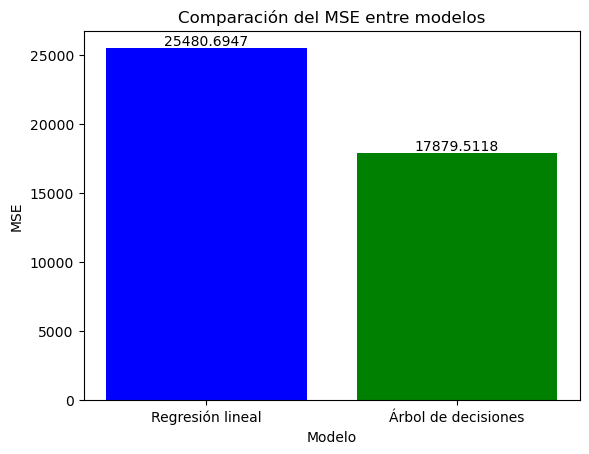

In [60]:
import matplotlib.pyplot as plt

# Define los nombres de los modelos
modelos = ['Regresión lineal', 'Árbol de decisiones']

# Define los valores de MSE para cada modelo
mse_valores = [mse_lineal, mse_arbol]

# Crea el gráfico de barras
plt.bar(modelos, mse_valores, color=['blue', 'green'])

# Agrega título y etiquetas de los ejes
plt.title('Comparación del MSE entre modelos')
plt.xlabel('Modelo')
plt.ylabel('MSE')

# Agrega las etiquetas de datos encima de cada barra
for i, mse in enumerate(mse_valores):
    plt.text(i, mse + 0.001, round(mse, 4), ha='center', va='bottom')
    
# Muestra la gráfica
plt.show()


El error cuadrático medio del modelo de árbol de decisión resultó menor que el de la regresión lineal por lo que se puede escoger como el mejor hasta el momento.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [67]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [68]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [69]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [70]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1) # calibrando max_depth
tree_clf.fit(X_train, y_train)

# Predicciones del árbol de decisión
y_pred_tree = tree_clf.predict(X_test)

# Métricas
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("Métricas del árbol de decisión:")
print("Accuracy:", accuracy_tree)
print("F1-Score:", f1_tree)

# Definición de la regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=1)  # calibrando max_iter
log_reg.fit(X_train, y_train)

# Predicciones de la regresión logística
y_pred_log_reg = log_reg.predict(X_test)

# Calcular métricas de la regresión logística
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("\nMétricas de la regresión logística:")
print("Accuracy:", accuracy_log_reg)
print("F1-Score:", f1_log_reg)


Métricas del árbol de decisión:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Métricas de la regresión logística:
Accuracy: 0.6146666666666667
F1-Score: 0.6062670299727521


- El árbol de decisión tiene un accuracy mayor (0.637) en comparación con la regresión logística (0.615). Esto indica que el árbol de decisión clasifica correctamente un mayor porcentaje de instancias en el conjunto de prueba en comparación con la regresión logística.
- El F1-Score del árbol de decisión (0.662) también es mayor que el de la regresión logística (0.606). El F1-Score tiene en cuenta tanto la precisión como la exhaustividad del modelo.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [72]:
# Celda 7

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Definir los modelos base
tree_max_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, random_state=42)
tree_min_samples_leaf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), n_estimators=100, random_state=42)
logistic_regression = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, random_state=42)

# Entrenar los modelos base
tree_max_depth.fit(X_train, y_train)
tree_min_samples_leaf.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Evaluar los modelos base
y_pred_tree_max_depth = tree_max_depth.predict(X_test)
y_pred_tree_min_samples_leaf = tree_min_samples_leaf.predict(X_test)
y_pred_logistic_regression = logistic_regression.predict(X_test)

accuracy_tree_max_depth = accuracy_score(y_test, y_pred_tree_max_depth)
accuracy_tree_min_samples_leaf = accuracy_score(y_test, y_pred_tree_min_samples_leaf)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

f1_score_tree_max_depth = f1_score(y_test, y_pred_tree_max_depth)
f1_score_tree_min_samples_leaf = f1_score(y_test, y_pred_tree_min_samples_leaf)
f1_score_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

print("Métricas para el conjunto de árboles de decisión con max_depth:")
print("Accuracy:", accuracy_tree_max_depth)
print("F1-Score:", f1_score_tree_max_depth)
print("")

print("Métricas para el conjunto de árboles de decisión con min_samples_leaf:")
print("Accuracy:", accuracy_tree_min_samples_leaf)
print("F1-Score:", f1_score_tree_min_samples_leaf)
print("")

print("Métricas para el conjunto de regresión logística:")
print("Accuracy:", accuracy_logistic_regression)
print("F1-Score:", f1_score_logistic_regression)
print("")

# Realizar la votación mayoritaria
y_pred_ensamble = np.round((y_pred_tree_max_depth + y_pred_tree_min_samples_leaf + y_pred_logistic_regression) / 3)

accuracy_ensamble = accuracy_score(y_test, y_pred_ensamble)
f1_score_ensamble = f1_score(y_test, y_pred_ensamble)

print("Métricas para el ensamble de modelos:")
print("Accuracy:", accuracy_ensamble)
print("F1-Score:", f1_score_ensamble)


Métricas para el conjunto de árboles de decisión con max_depth:
Accuracy: 0.6573333333333333
F1-Score: 0.6573333333333333

Métricas para el conjunto de árboles de decisión con min_samples_leaf:
Accuracy: 0.656
F1-Score: 0.6596306068601584

Métricas para el conjunto de regresión logística:
Accuracy: 0.618
F1-Score: 0.6136210384356034

Métricas para el ensamble de modelos:
Accuracy: 0.66
F1-Score: 0.6613545816733067


Lo anterior muestra que las métricas de ensamble de modelos son mejores que las mostradas individualmente

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [77]:
# Celda 8
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Entrenar los tres ensambles con 100 modelos cada uno
# Primer ensamble: árboles de decisión con max_depth
bagging_max_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100)
bagging_max_depth.fit(X_train, y_train)

# Segundo ensamble: árboles de decisión con min_samples_leaf
bagging_min_samples_leaf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5), n_estimators=100)
bagging_min_samples_leaf.fit(X_train, y_train)

# Tercer ensamble: regresión logística
logistic_regression = LogisticRegression()
bagging_logistic = BaggingClassifier(base_estimator=logistic_regression, n_estimators=100)
bagging_logistic.fit(X_train, y_train)

# Obtener predicciones de cada modelo
y_pred_max_depth = bagging_max_depth.predict(X_test)
y_pred_min_samples_leaf = bagging_min_samples_leaf.predict(X_test)
y_pred_logistic = bagging_logistic.predict(X_test)

# Calcular métricas de cada modelo
accuracy_max_depth = accuracy_score(y_test, y_pred_max_depth)
accuracy_min_samples_leaf = accuracy_score(y_test, y_pred_min_samples_leaf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

f1_score_max_depth = f1_score(y_test, y_pred_max_depth)
f1_score_min_samples_leaf = f1_score(y_test, y_pred_min_samples_leaf)
f1_score_logistic = f1_score(y_test, y_pred_logistic)

# Calcular pesos para la votación ponderada (por ejemplo, basado en el desempeño de cada modelo)
weight_max_depth = 0.4
weight_min_samples_leaf = 0.3
weight_logistic = 0.3

# Combinar predicciones ponderadas
y_pred_weighted = (weight_max_depth * y_pred_max_depth + 
                   weight_min_samples_leaf * y_pred_min_samples_leaf + 
                   weight_logistic * y_pred_logistic)

y_pred_weighted_binary = np.where(y_pred_weighted >= 0.5, 1, 0)

# Calcular métricas del ensamble ponderado
accuracy_weighted = accuracy_score(y_test, y_pred_weighted_binary)
f1_score_weighted = f1_score(y_test, y_pred_weighted_binary)

# Imprimir resultados
print("Métricas del ensamble ponderado:")
print("Accuracy:", accuracy_weighted)
print("F1-Score:", f1_score_weighted)


Métricas del ensamble ponderado:
Accuracy: 0.6526666666666666
F1-Score: 0.6533599467731204


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Celda 9

Cuando comparamos la metodología de ensamble por votación mayoritaria se encuentran métricas mejores que en la metodología ponderada (accuracy de 0.66 vs 0.65, y F1-Score de 0.66 vs 0.65). Las ventajas de la votación mayoritaria es que es simple pues se selecciona la clase más frecuente predicha por los modelos, sin embargo la desventaja es que le asigna igualdad de votos (pesos) lo que puede llegar a no ser óptimo considerando unos modelos mejores que otros. Por el lado de la votación ponderada es flexible al permitir asignar pesos sin embargo es necesario tener cuidado con dicha asignación para no generar errores.